In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [139]:
# checking for imbalance
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [140]:
# checking which columns have zero values
columns_with_zeros = []
for col in df.columns[:-1]:         # leaving target column from calculations
    if (df[col] == 0).sum() > 0:
        print(f"{col.ljust(30)}: {(df[col] == 0).sum()}")
        columns_with_zeros.append(col)
    else:
        print(f"{col.ljust(30)}: No zero value")

print(f"\n{columns_with_zeros}")

Pregnancies                   : 111
Glucose                       : 5
BloodPressure                 : 35
SkinThickness                 : 227
Insulin                       : 374
BMI                           : 11
DiabetesPedigreeFunction      : No zero value
Age                           : No zero value

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [141]:
# removing Pregnancies column as it can definitely have zero value
columns_with_zeros.remove('Pregnancies')
columns_with_zeros

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

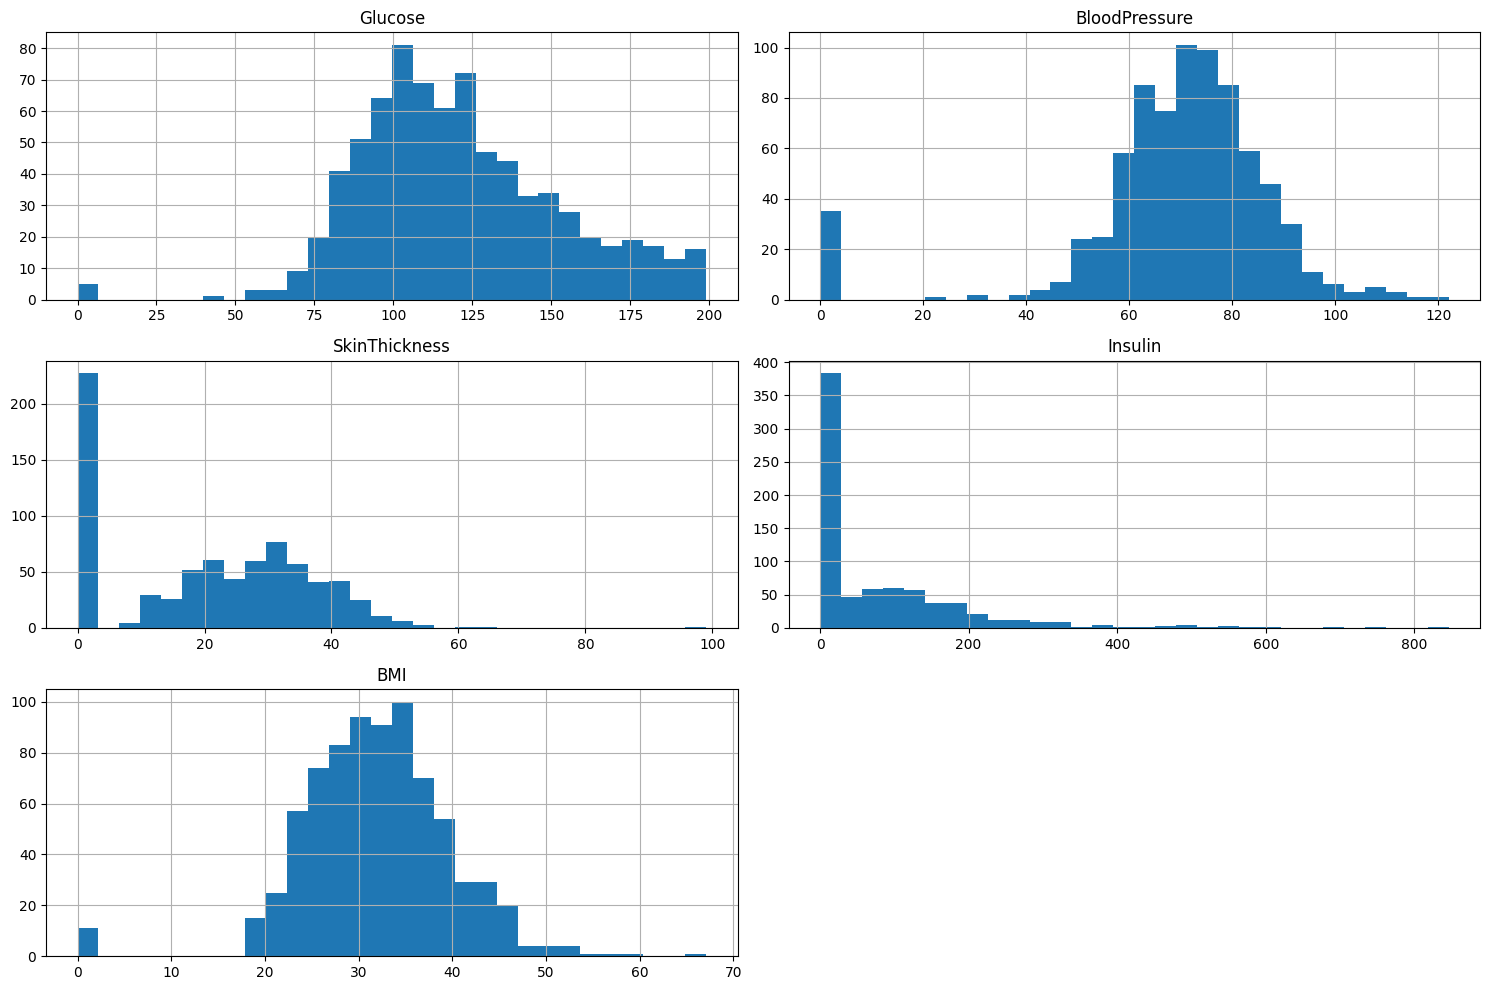

In [142]:
# visualizing feature distribution
df[columns_with_zeros].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [143]:
# replacing 0's with NaN values for better visualization
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [144]:
# checking skewness of SkinThickness column
df[df['SkinThickness']>50].sort_values('SkinThickness',ascending= True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
275,2,100.0,70.0,52.0,57.0,40.5,0.677,25,0
532,1,86.0,66.0,52.0,65.0,41.3,0.917,29,0
86,13,106.0,72.0,54.0,NaN,36.6,0.178,45,0
211,0,147.0,85.0,54.0,NaN,42.8,0.375,24,0
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1


In [145]:
# dropping the likely wrong value of skin thickness = 99
df.drop(df[df['SkinThickness']== 99].index, axis=0,inplace= True)

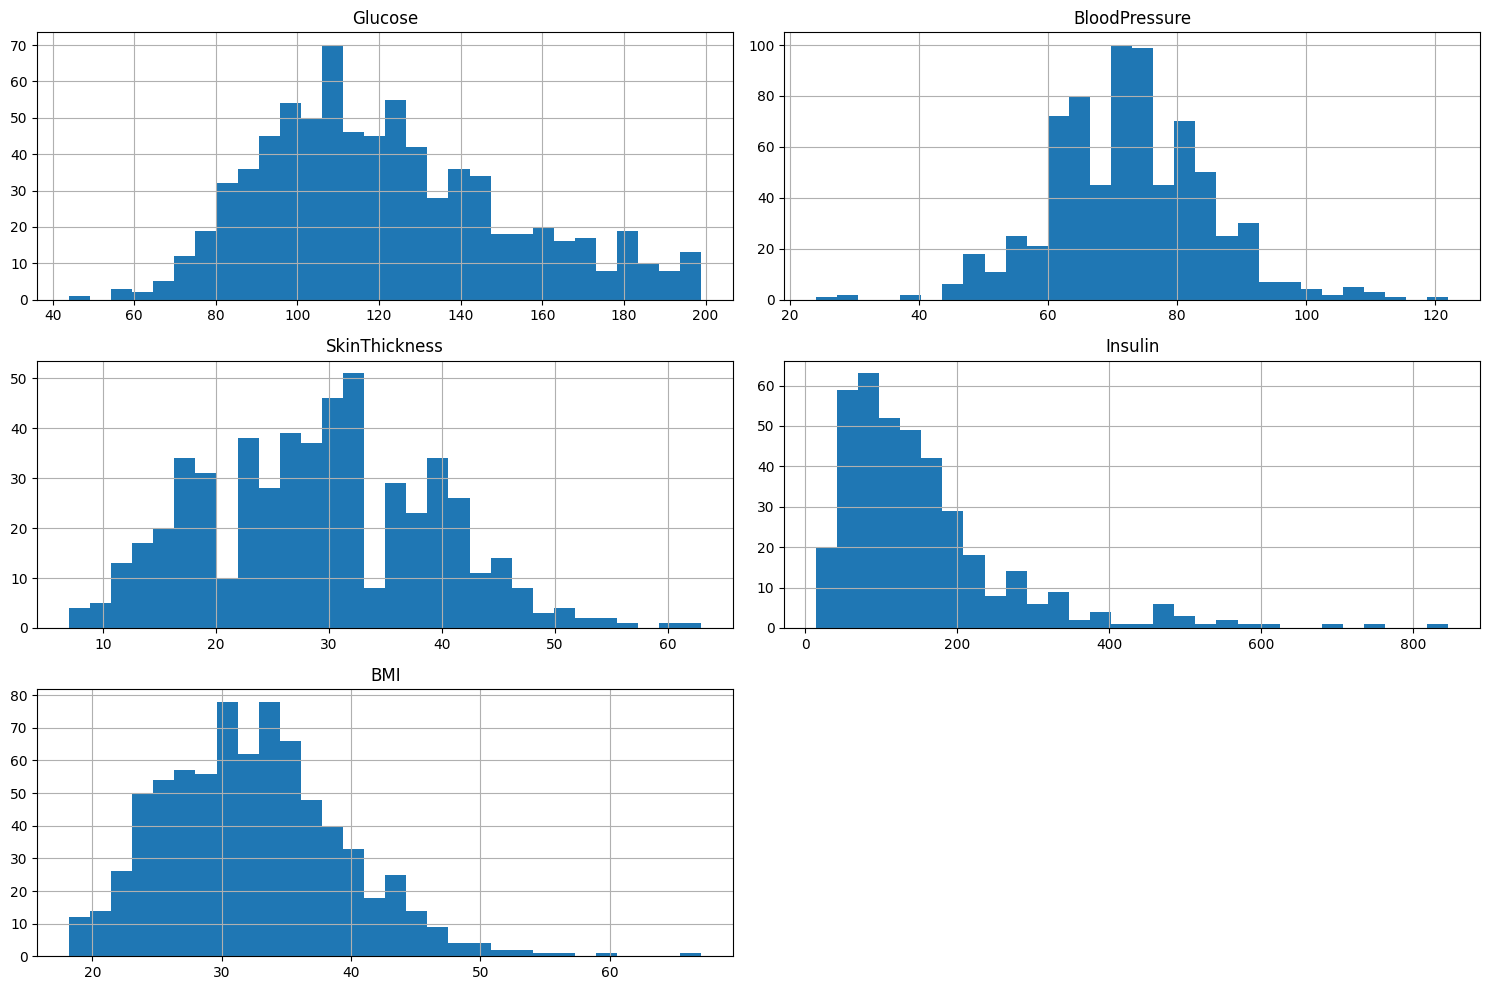

In [146]:
# visualizing again
df[columns_with_zeros].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [147]:
# doing imputation
from sklearn.impute import SimpleImputer

# taking two different strategies
mean_imputer = SimpleImputer(strategy= 'mean')
median_imputer = SimpleImputer(strategy= 'median')

df[['Glucose', 'BloodPressure', 'SkinThickness']] = mean_imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness']])

df[['Insulin', 'BMI']] = median_imputer.fit_transform(df[['Insulin', 'BMI']])

In [148]:
# confirming
df[columns_with_zeros].isna().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [149]:
# checking correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130234,0.208426,0.091517,0.024923,0.021798,-0.033309,0.548341,0.223189
Glucose,0.130234,1.000000,0.219902,0.175103,0.421355,0.231013,0.136616,0.260702,0.491078
BloodPressure,0.208426,0.219902,1.000000,0.202611,0.045040,0.281310,-0.002686,0.326513,0.166638
SkinThickness,0.091517,0.175103,0.202611,1.000000,0.164273,0.563479,0.103118,0.105863,0.209863
Insulin,0.024923,0.421355,0.045040,0.164273,1.000000,0.180335,0.126588,0.098066,0.204367
BMI,0.021798,0.231013,0.281310,0.563479,0.180335,1.000000,0.153325,0.024653,0.311858
DiabetesPedigreeFunction,-0.033309,0.136616,-0.002686,0.103118,0.126588,0.153325,1.000000,0.032698,0.173512
Age,0.548341,0.260702,0.326513,0.105863,0.098066,0.024653,0.032698,1.000000,0.235203
Outcome,0.223189,0.491078,0.166638,0.209863,0.204367,0.311858,0.173512,0.235203,1.000000


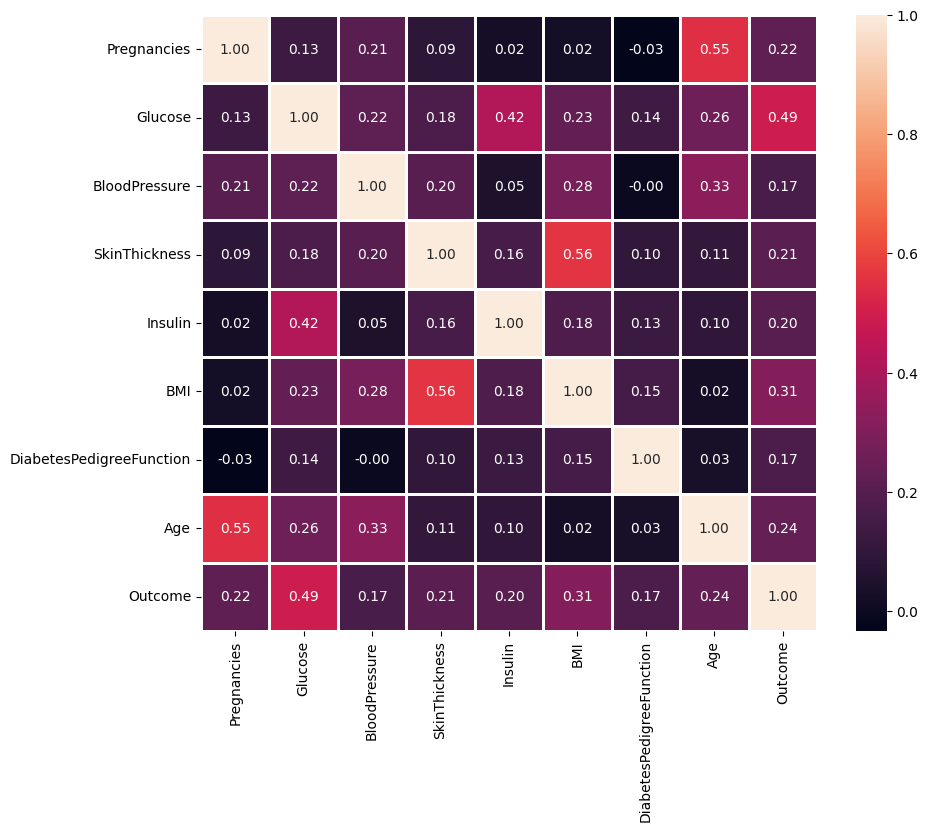

In [150]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square= True, linewidths= 1)
plt.show()

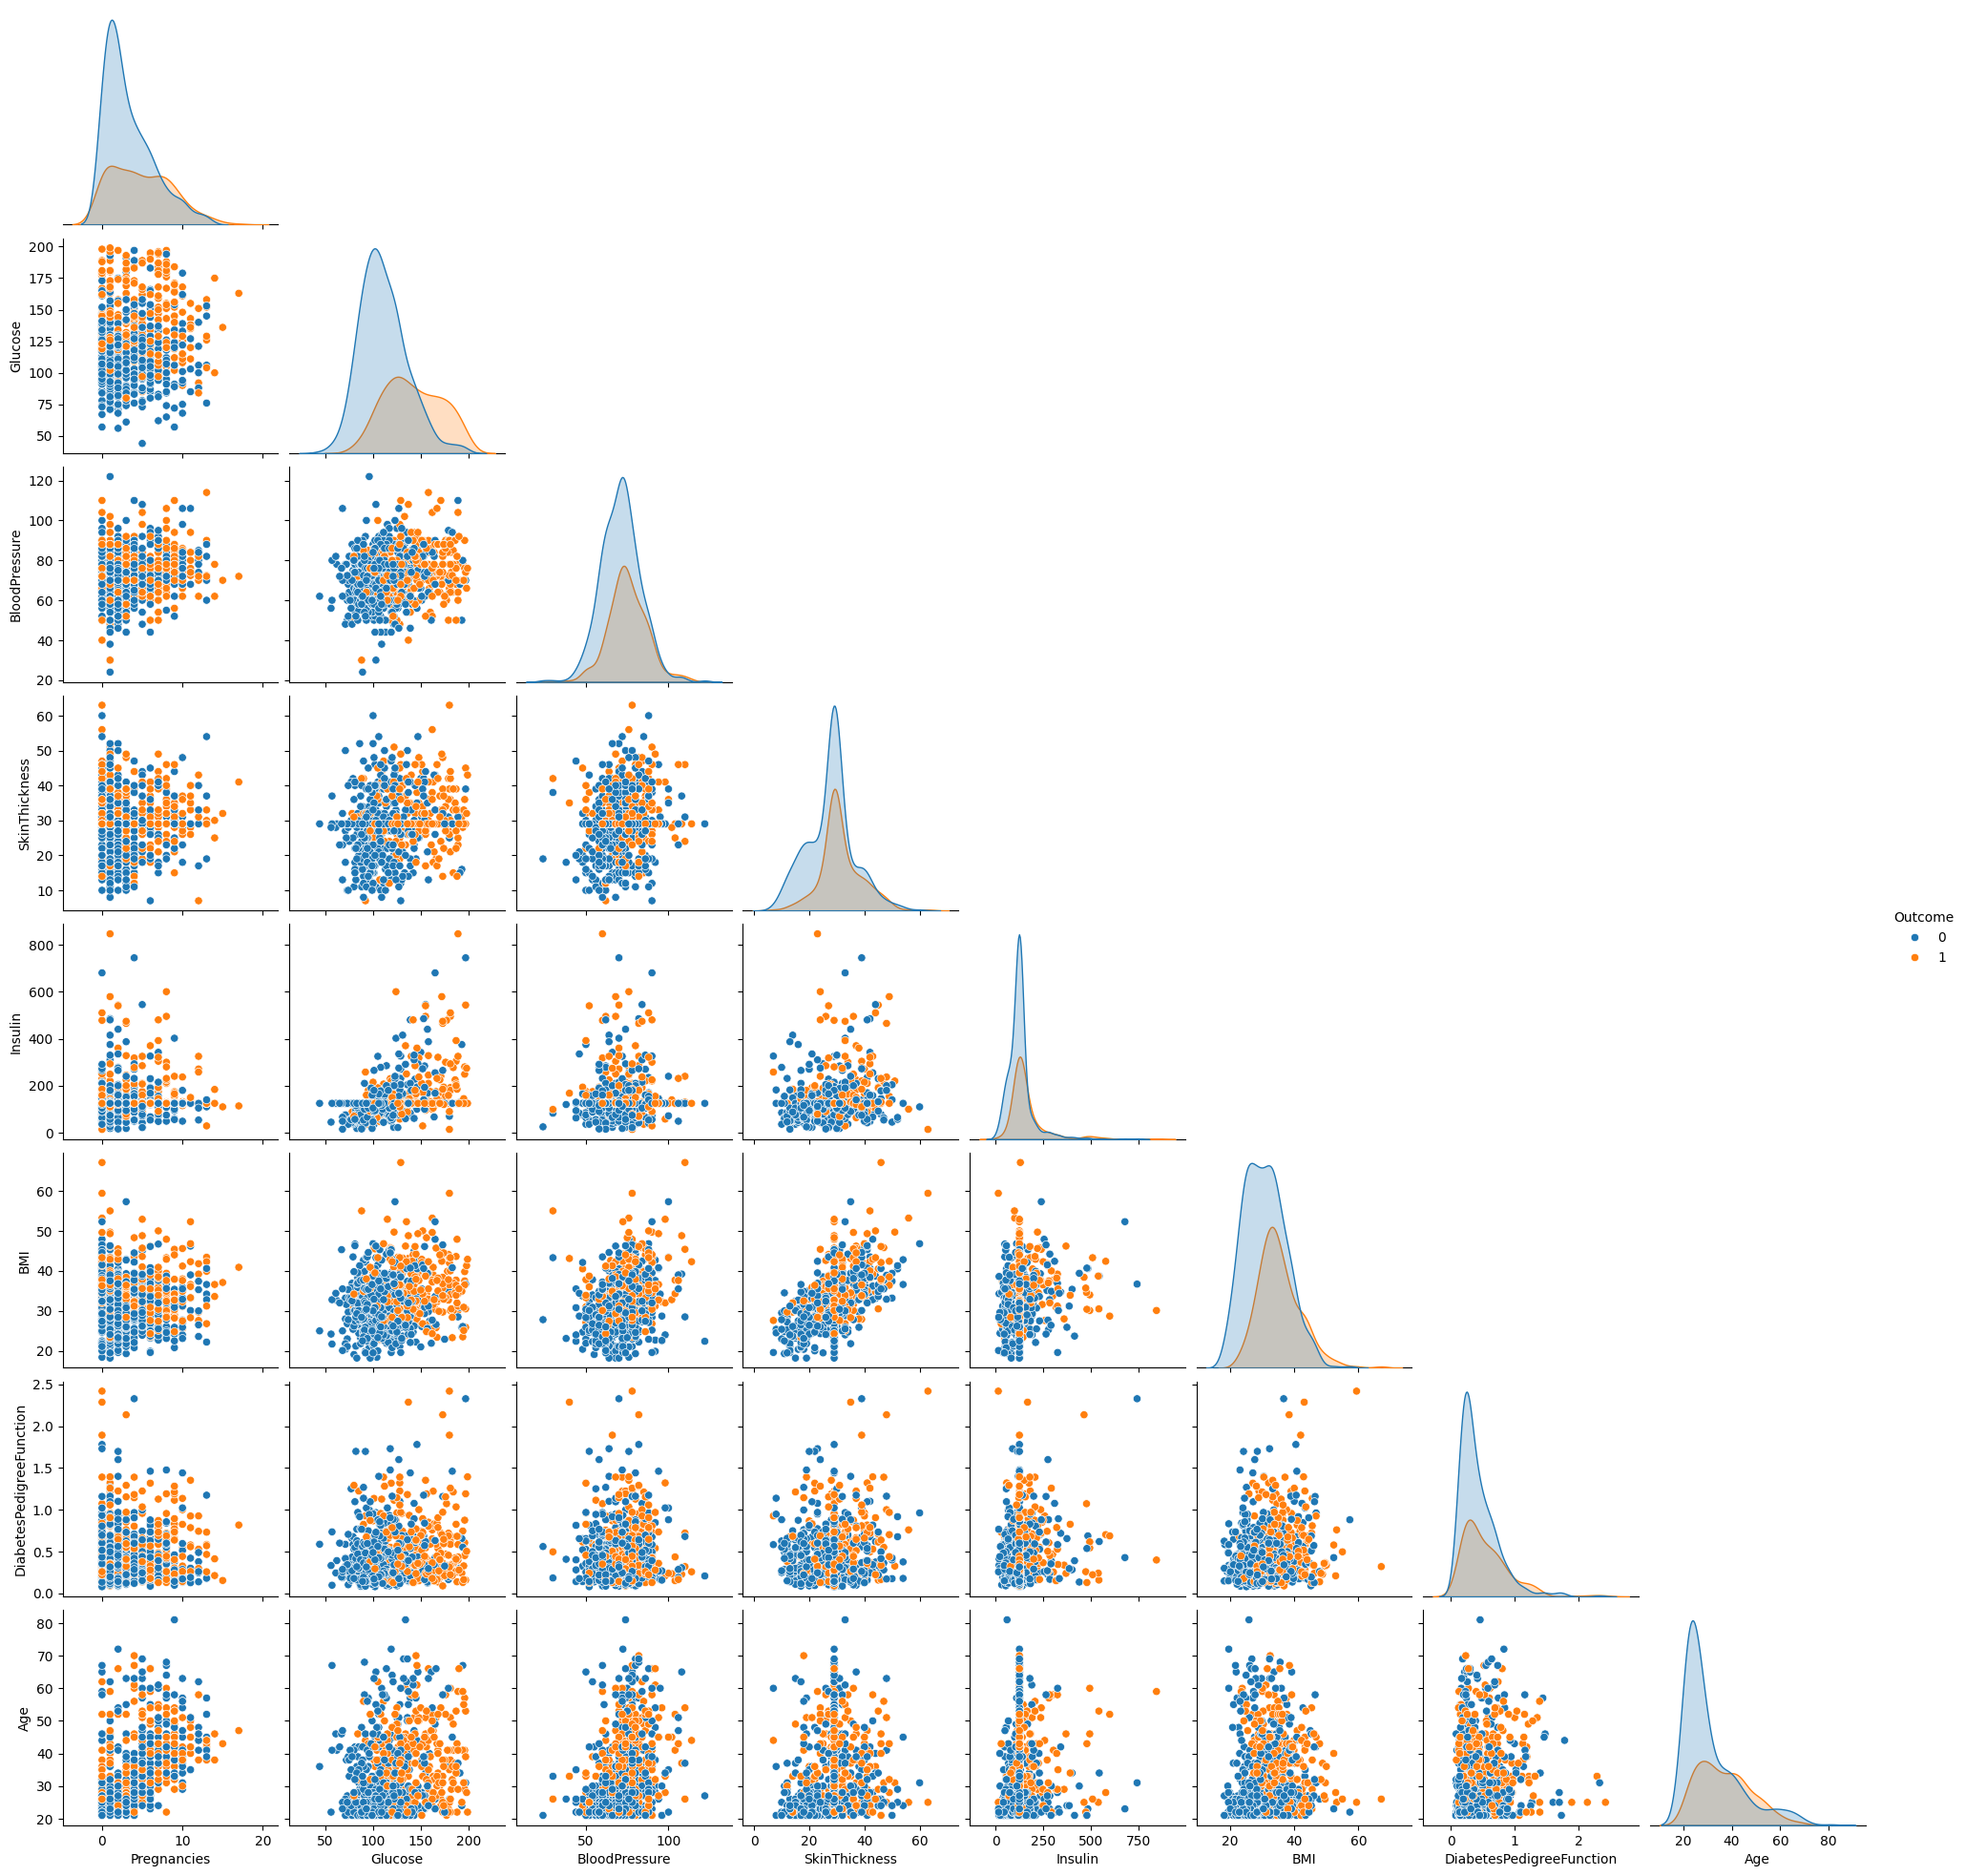

In [151]:
sns.pairplot(df, hue='Outcome', corner=True)
plt.show()

In [152]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)  # using stratify = y to make sure class distribution is even

In [153]:
y_train.shape

(613,)

In [154]:
# checking class distribution
(y_train == 1).sum()/len(y_train)*100

np.float64(34.74714518760196)

In [155]:
(y_test == 1).sum()/len(y_test)*100

np.float64(35.064935064935064)

In [156]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [157]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix

# LOGISTIC REGRESSION

In [158]:
print('='*50)
print("LOGISTIC REGRESSION")
print('='*50)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix,  roc_auc_score

logistic = LogisticRegression()
logistic.fit(X_train_t, y_train)

y_pred = logistic.predict(X_test_t)
y_proba = logistic.predict_proba(X_test_t)[:, 1]


roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"\nROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

LOGISTIC REGRESSION

ROC AUC: 0.8124
PR-AUC (AP): 0.6823
Accuracy: 0.7078
Balanced Accuracy: 0.6685
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
 [[80 20]
 [25 29]]


LOGISTIC REGRESSION THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.270
ROC AUC: 0.8124
PR-AUC (AP): 0.6823
Accuracy: 0.7208
Balanced Accuracy: 0.7424
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       100
           1       0.57      0.81      0.67        54

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.77      0.72      0.73       154

=== Confusion Matrix ===
[[67 33]
 [10 44]]
Precision at Selected Threshold: 0.5714
Recall at Selected Threshold: 0.8148


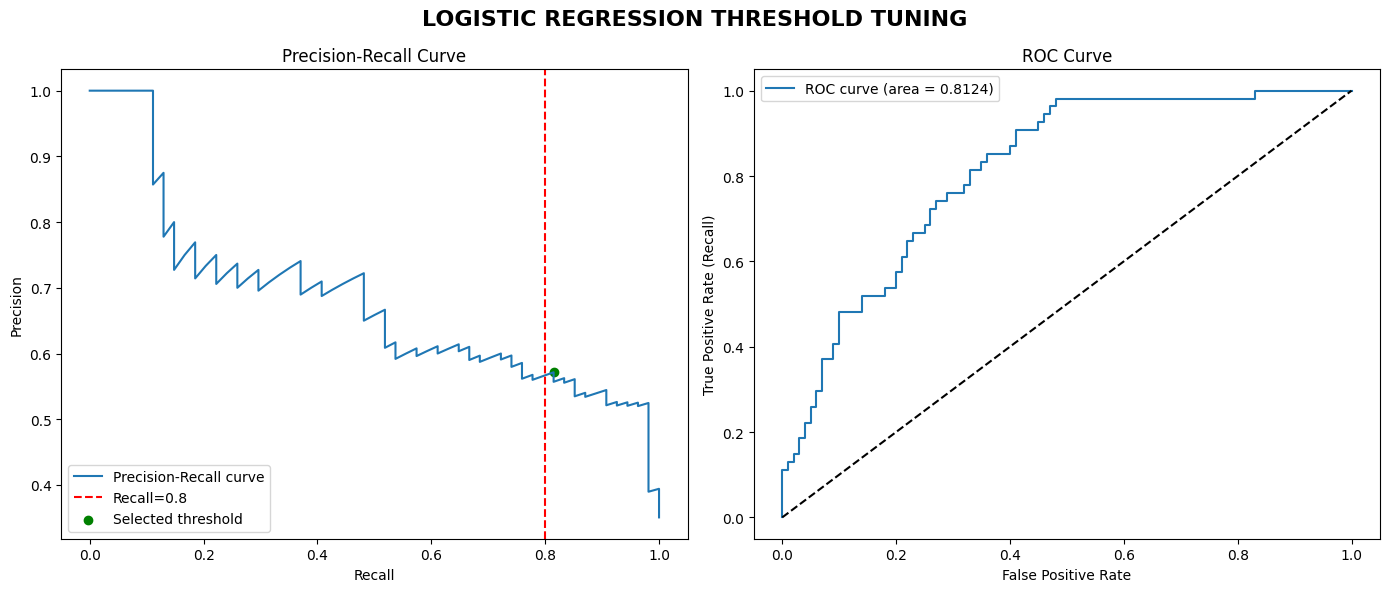

In [159]:
# Threshold tuning
model = "LOGISTIC REGRESSION THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = logistic.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [160]:
# Feature importance
print("\n=== Features sorted by coefficient ===")

feature_names = list(X_train.columns)
coefs = logistic.coef_[0]
feature_coef_pairs = list(zip(feature_names, coefs))
feature_importance = sorted(feature_coef_pairs, key=lambda x: x[1], reverse=True)
for name, coef in feature_importance[:10]:
    print(f"{name.ljust(30)}: {coef:+.4f}")


=== Features sorted by coefficient ===
Glucose                       : +1.1492
BMI                           : +0.6801
Pregnancies                   : +0.4473
DiabetesPedigreeFunction      : +0.2789
Age                           : +0.1179
SkinThickness                 : +0.0182
Insulin                       : -0.0240
BloodPressure                 : -0.0516


# RIDGE REGRESSION

In [161]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

print('='*50)
print("RIDGE REGRESSION")
print('='*50)

ridge = LogisticRegression(
    penalty= 'l2',
    solver= 'lbfgs',
    max_iter= 1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= ridge,
    param_grid= params,
    cv = cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best C: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_ridge = grid.best_estimator_

y_pred = best_ridge.predict(X_test_t)
y_proba = best_ridge.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
print("\n=== Features sorted by coefficient ===")

feature_names = list(X_train.columns)
coefs = best_ridge.coef_[0]
feature_coef_pairs = list(zip(feature_names, coefs))
feature_importance = sorted(feature_coef_pairs, key=lambda x: x[1], reverse=True)
for name, coef in feature_importance[:10]:
    print(f"{name.ljust(30)}: {coef:+.4f}")


RIDGE REGRESSION
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best C: {'C': 1}
Best CV PR-AUC: 0.7435

ROC AUC: 0.8107
PR-AUC: 0.6809
Accuracy: 0.7273
Balanced Accuracy: 0.7176
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.60      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

Confusion Matrix:
 [[75 25]
 [17 37]]

=== Features sorted by coefficient ===
Glucose                       : +1.1622
BMI                           : +0.6978
Pregnancies                   : +0.4431
DiabetesPedigreeFunction      : +0.3336
Age                           : +0.1525
SkinThickness                 : +0.0094
Insulin                       : -0.0016
BloodPressure                 : -0.0271


RIDGE REGRESSION THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.393
ROC AUC: 0.8107
PR-AUC (AP): 0.6809
Accuracy: 0.7143
Balanced Accuracy: 0.7374
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       100
           1       0.56      0.81      0.67        54

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154

=== Confusion Matrix ===
[[66 34]
 [10 44]]
Precision at Selected Threshold: 0.5641
Recall at Selected Threshold: 0.8148


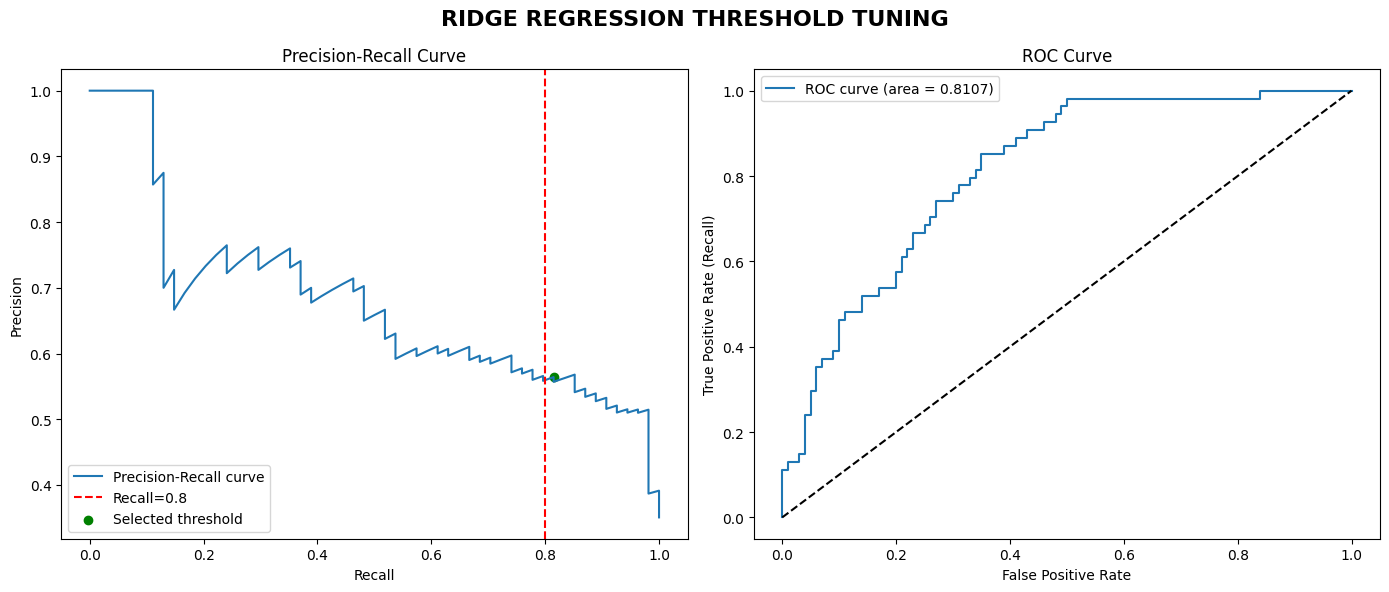

In [162]:
# Threshold tuning
model = 'RIDGE REGRESSION THRESHOLD TUNING'
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_ridge.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# LASSO

In [163]:
print('='*50)
print("LASSO")
print('='*50)

lasso = LogisticRegression(
    penalty= 'l1',
    solver= 'liblinear',
    max_iter=1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= lasso,
    param_grid= params,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best C: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_lasso = grid.best_estimator_

y_pred = best_lasso.predict(X_test_t)
y_proba = best_lasso.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# FEATURE SELECTION
print("\n" + "="*50)
print("LASSO FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)

coefs = best_lasso.coef_[0]

# Separate selected (non-zero) and eliminated (zero) features
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if coef != 0]
eliminated_features = [name for name, coef in zip(feature_names, coefs) if coef == 0]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Zero Coefficients) ===")
    for name in eliminated_features:
        print(f"{name.ljust(30)}: 0.0000 (not used)")

LASSO
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best C: {'C': 0.1}
Best CV PR-AUC: 0.7378

ROC AUC: 0.8087
PR-AUC: 0.6807
Accuracy: 0.7273
Balanced Accuracy: 0.7261
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154

Confusion Matrix:
 [[73 27]
 [15 39]]

LASSO FEATURE SELECTION

SELECTED FEATURES: 5 out of 8
ELIMINATED FEATURES: 3 out of 8

=== Selected Features (Non-Zero Coefficients) ===
Glucose                       : +1.0308
BMI                           : +0.5618
Pregnancies                   : +0.3446
DiabetesPedigreeFunction      : +0.2234
Age                           : +0.0886

=== Eliminated Features (Zero Coefficients) ===
BloodPressure                 : 0.0000 (

LASSO REGRESSION THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.424
ROC AUC: 0.8087
PR-AUC (AP): 0.6807
Accuracy: 0.7078
Balanced Accuracy: 0.7324
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       100
           1       0.56      0.81      0.66        54

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.76      0.71      0.71       154

=== Confusion Matrix ===
[[65 35]
 [10 44]]
Precision at Selected Threshold: 0.5570
Recall at Selected Threshold: 0.8148


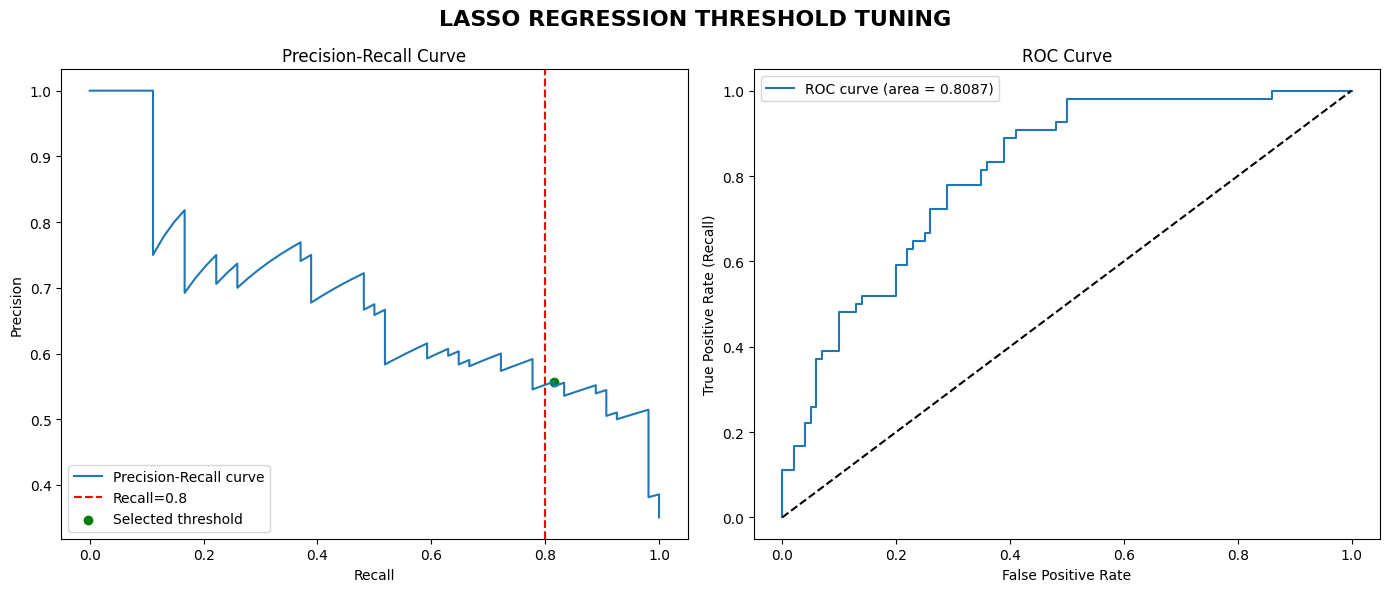

In [164]:
# Threshold tuning
model = "LASSO REGRESSION THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_lasso.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# ELASTICNET

In [165]:
print('='*50)
print('ELASTICNET')
print('='*50)

elastic = LogisticRegression(
    penalty= 'elasticnet',
    solver= 'saga',
    max_iter= 2000,
    class_weight= 'balanced',
    random_state= 42
)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

cv = StratifiedKFold(
    n_splits= 5, shuffle= True, random_state= 42
)

grid = GridSearchCV(
    estimator= elastic,
    param_grid= params,
    scoring= 'average_precision',
    cv= cv,
    n_jobs= -1,
    verbose= 1
)


grid.fit(X_train_t, y_train)

print(f"\nBest params: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_elastic = grid.best_estimator_

y_pred = best_elastic.predict(X_test_t)
y_proba = best_elastic.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# FEATURE SELECTION ANALYSIS
print("\n" + "="*50)
print("ELASTIC NET FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)
coefs = best_elastic.coef_[0]

# Separate selected (non-zero) and eliminated (near-zero) features
# Use small threshold since Elastic Net rarely gives exact zeros
threshold = 1e-5
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if abs(coef) > threshold]
eliminated_features = [(name, coef) for name, coef in zip(feature_names, coefs) if abs(coef) <= threshold]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Near-Zero Coefficients) ===")
    for name, coef in eliminated_features:
        print(f"{name.ljust(30)}: {coef:+.4f} (not used)")


ELASTICNET
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best params: {'C': 0.1, 'l1_ratio': 0.5}
Best CV PR-AUC: 0.7474

ROC AUC: 0.8102
PR-AUC: 0.6798
Accuracy: 0.7143
Balanced Accuracy: 0.7033
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154

Confusion Matrix:
 [[74 26]
 [18 36]]

ELASTIC NET FEATURE SELECTION

SELECTED FEATURES: 6 out of 8
ELIMINATED FEATURES: 2 out of 8

=== Selected Features (Non-Zero Coefficients) ===
Glucose                       : +1.0290
BMI                           : +0.5931
Pregnancies                   : +0.3639
DiabetesPedigreeFunction      : +0.2620
Age                           : +0.1320
SkinThickness                 : +0.0101

=== Eliminat

ELASTICNET THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.405
ROC AUC: 0.8102
PR-AUC (AP): 0.6798
Accuracy: 0.7143
Balanced Accuracy: 0.7374
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       100
           1       0.56      0.81      0.67        54

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154

=== Confusion Matrix ===
[[66 34]
 [10 44]]
Precision at Selected Threshold: 0.5641
Recall at Selected Threshold: 0.8148


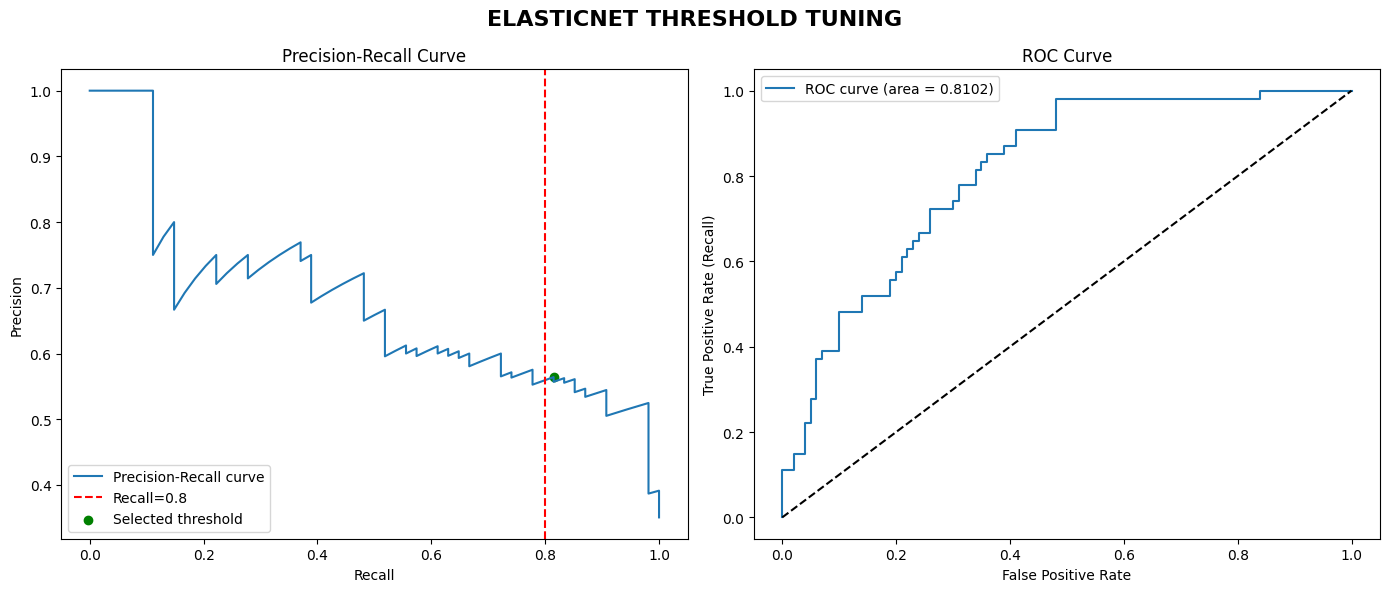

In [166]:
# Threshold tuning
model = "ELASTICNET THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_elastic.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# KNN

In [167]:
print('='*50)
print('KNN')
print('='*50)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, average_precision_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_t, y_train)

y_pred = knn.predict(X_test_t)
y_proba = knn.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

KNN
ROC AUC: 0.7965
PR-AUC (AP): 0.6680
Accuracy: 0.7468
Balanced Accuracy: 0.7156
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

Confusion Matrix:
 [[82 18]
 [21 33]]


In [168]:
print('='*50)
print('KNN HYPERPARAMETER TUNING:')
print('='*50)

from sklearn.model_selection import GridSearchCV, StratifiedKFold

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,15,21],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 4, 5]
}


cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= knn,
    param_grid= params,
    cv=cv,
    scoring='average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t,y_train)

print("Best KNN params:", grid.best_params_)
print("Best CV PR-AUC:", grid.best_score_)

best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_t)
y_proba = best_knn.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


KNN HYPERPARAMETER TUNING:
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best KNN params: {'metric': 'minkowski', 'n_neighbors': 21, 'p': 2, 'weights': 'distance'}
Best CV PR-AUC: 0.737180428664133
ROC AUC: 0.8041
PR-AUC (AP): 0.7080
Accuracy: 0.7403
Balanced Accuracy: 0.6893
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

Confusion Matrix:
 [[86 14]
 [26 28]]


KNN THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.306
ROC AUC: 0.8041
PR-AUC (AP): 0.7080
Accuracy: 0.7208
Balanced Accuracy: 0.7424
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       100
           1       0.57      0.81      0.67        54

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.77      0.72      0.73       154

=== Confusion Matrix ===
[[67 33]
 [10 44]]
Precision at Selected Threshold: 0.5714
Recall at Selected Threshold: 0.8148


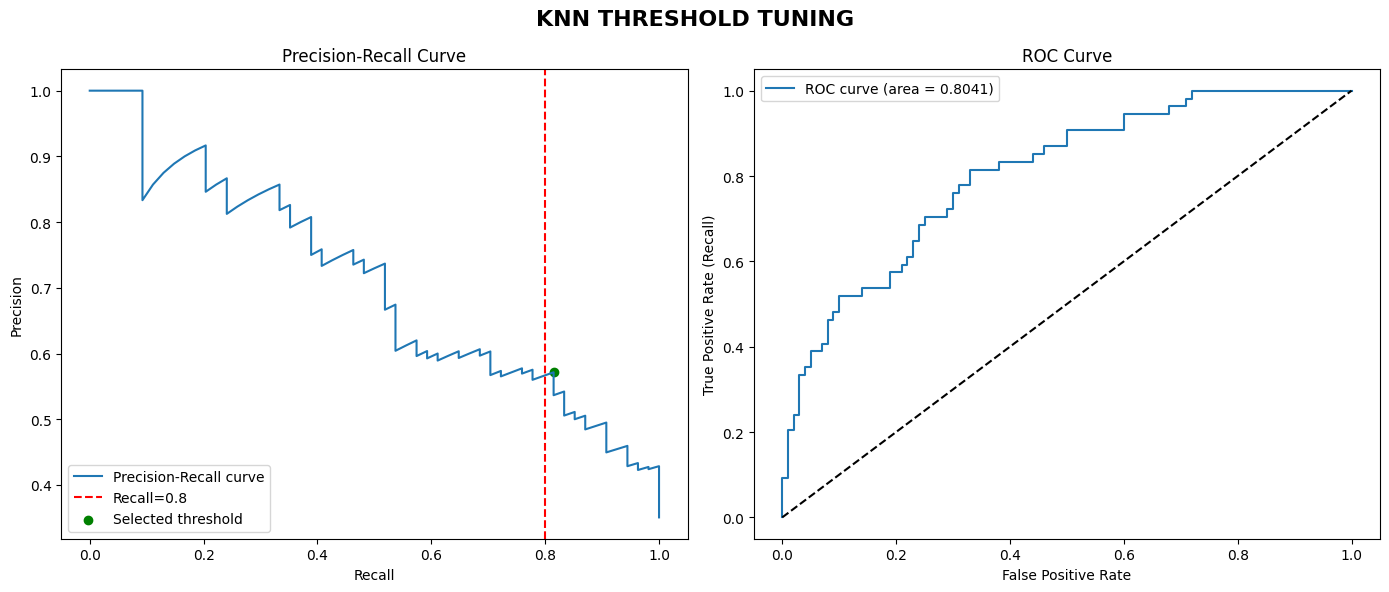

In [169]:
# Threshold tuning
model = "KNN THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_knn.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# SVM

In [170]:
print('='*50)
print('SVM')
print('='*50)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix

svm = SVC(
    kernel= 'rbf',
    C= 1.0,
    gamma= 'scale',
    class_weight= 'balanced',
    probability= True,
    random_state= 42
)

svm.fit(X_train_t, y_train)

y_pred = svm.predict(X_test_t)
y_proba = svm.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


SVM
ROC AUC: 0.8031
PR-AUC (AP): 0.6705
Accuracy: 0.7143
Balanced Accuracy: 0.7076
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       100
           1       0.58      0.69      0.63        54

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

Confusion Matrix:
 [[73 27]
 [17 37]]


In [171]:
print('='*50)
print('SVM HYPERPARAMETER TUNING')
print('='*50)

svm = SVC(
    class_weight= 'balanced',
    probability= True,
    random_state= 42
)

params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state= 42)

grid = GridSearchCV(
    estimator= svm,
    param_grid= params,
    cv= cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_svm = grid.best_estimator_

y_pred = best_svm.predict(X_test_t)
y_proba = best_svm.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nTest Set Evaluation")
print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


SVM HYPERPARAMETER TUNING
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV PR-AUC: 0.7425

Test Set Evaluation
ROC AUC: 0.8052
PR-AUC (AP): 0.6945
Accuracy: 0.7338
Balanced Accuracy: 0.7226
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Confusion Matrix:
 [[76 24]
 [17 37]]


SVM THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.247
ROC AUC: 0.8052
PR-AUC (AP): 0.6945
Accuracy: 0.7078
Balanced Accuracy: 0.7324
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       100
           1       0.56      0.81      0.66        54

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.76      0.71      0.71       154

=== Confusion Matrix ===
[[65 35]
 [10 44]]
Precision at Selected Threshold: 0.5570
Recall at Selected Threshold: 0.8148


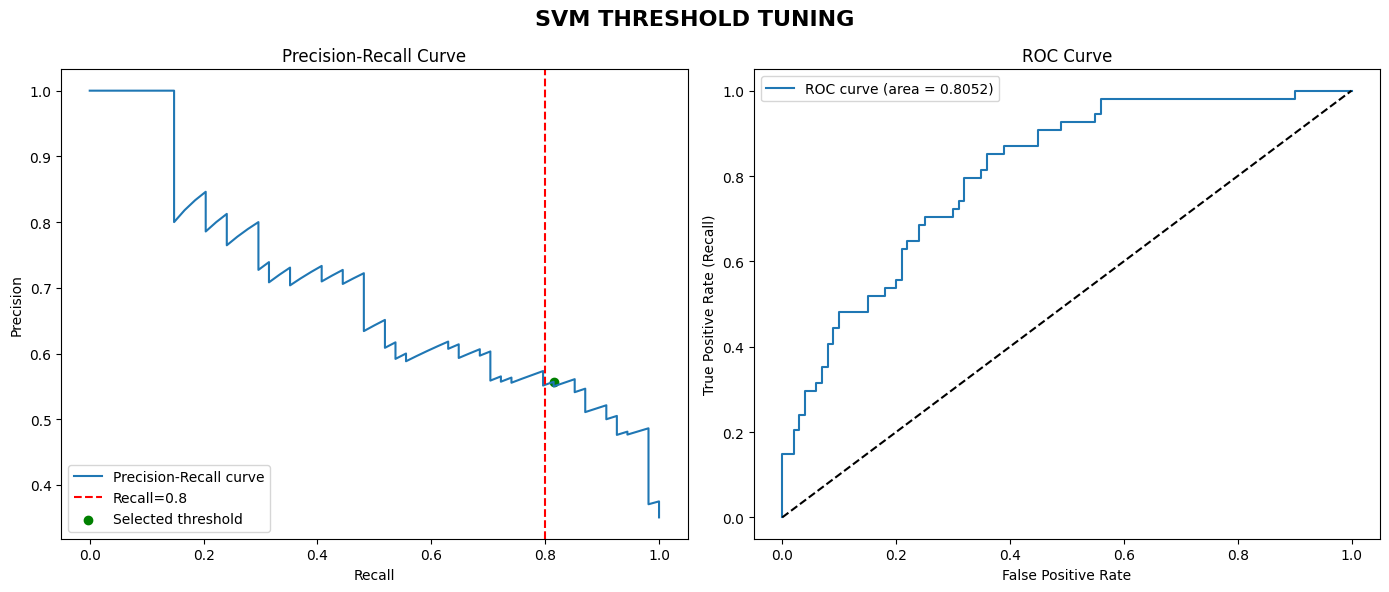

In [172]:
# Threshold tuning
model = "SVM THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_svm.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# NAIVE BAYES

In [173]:
print('='*50)
print('NAIVE BAYES')
print('='*50)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_t, y_train)
y_pred = nb.predict(X_test_t)
y_proba = nb.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

NAIVE BAYES
ROC AUC: 0.7678
PR-AUC (AP): 0.5969
Accuracy: 0.6948
Balanced Accuracy: 0.6756
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       100
           1       0.56      0.61      0.58        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.70       154

Confusion Matrix:
 [[74 26]
 [21 33]]


In [174]:
print('='*50)
print('HYPERPARAMETER TUNING FOR NAIVE BAYES')
print('='*50)

params = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

cv = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= nb,
    param_grid= params,
    scoring= 'average_precision',
    cv= cv,
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_nb = grid.best_estimator_
y_pred = best_nb.predict(X_test_t)
y_proba = best_nb.predict_proba(X_test_t)[:, 1]


roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

HYPERPARAMETER TUNING FOR NAIVE BAYES
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'var_smoothing': 1e-10}
Best CV-PR-AUC: 0.7066
ROC AUC: 0.7678
PR-AUC (AP): 0.5969
Accuracy: 0.6948
Balanced Accuracy: 0.6756
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       100
           1       0.56      0.61      0.58        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.70       154

Confusion Matrix:
 [[74 26]
 [21 33]]


NAIVE BAYES THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.117
ROC AUC: 0.7678
PR-AUC (AP): 0.5969
Accuracy: 0.6429
Balanced Accuracy: 0.6824
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.55      0.67       100
           1       0.49      0.81      0.62        54

    accuracy                           0.64       154
   macro avg       0.67      0.68      0.64       154
weighted avg       0.72      0.64      0.65       154

=== Confusion Matrix ===
[[55 45]
 [10 44]]
Precision at Selected Threshold: 0.4944
Recall at Selected Threshold: 0.8148


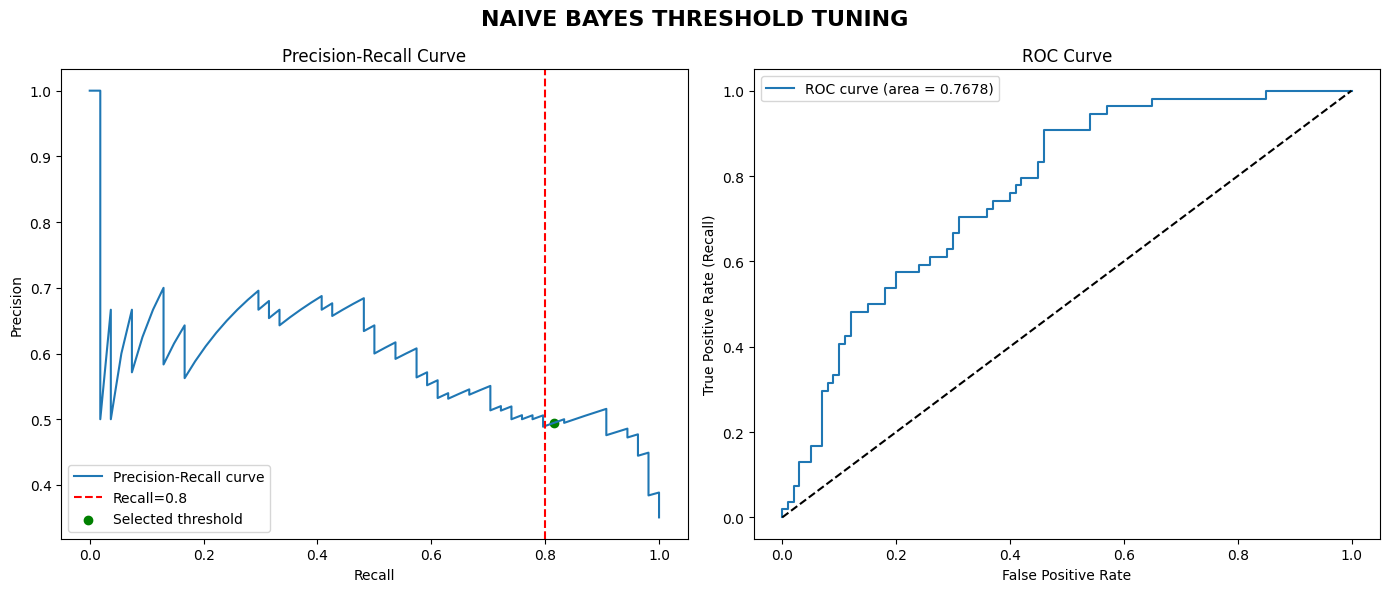

In [175]:
# Threshold tuning
model = "NAIVE BAYES THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_nb.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# DECISION TREE

In [176]:
print('='*50)
print('DECISION TREE')
print('='*50)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt.fit(X_train_t,y_train)


y_pred = dt.predict(X_test_t)
y_proba = dt.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

DECISION TREE
ROC AUC: 0.6778
PR-AUC (AP): 0.4892
Accuracy: 0.7143
Balanced Accuracy: 0.6778
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.60      0.56      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
 [[80 20]
 [24 30]]


In [177]:
print('='*50)
print('DECISION TREE HYPERPARAMETER TUNING')
print('='*50)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
dt = DecisionTreeClassifier(class_weight= 'balanced', 
                            random_state=42
                            )

params = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

cv = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)

grid_search = GridSearchCV(
    dt,
    param_grid= params,
    scoring= 'average_precision',
    cv=cv,
    verbose= 1
)


grid_search.fit(X_train_t,y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV PR-AUC score: {grid_search.best_score_:.4f}")

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_t)
y_proba = best_dt.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

DECISION TREE HYPERPARAMETER TUNING
Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV PR-AUC score: 0.6628
ROC AUC: 0.8119
PR-AUC (AP): 0.6467
Accuracy: 0.7338
Balanced Accuracy: 0.7481
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       100
           1       0.59      0.80      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154

Confusion Matrix:
 [[70 30]
 [11 43]]


In [178]:
# Add to your code
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE")
print("="*50)
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature'].ljust(30)}: {row['Importance']:.4f}")



FEATURE IMPORTANCE
Glucose                       : 0.4510
BMI                           : 0.2272
Age                           : 0.1325
DiabetesPedigreeFunction      : 0.0927
Insulin                       : 0.0605
BloodPressure                 : 0.0174
Pregnancies                   : 0.0142
SkinThickness                 : 0.0044


DECISION TREE THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.339
ROC AUC: 0.8119
PR-AUC (AP): 0.6467
Accuracy: 0.6883
Balanced Accuracy: 0.7174
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       100
           1       0.54      0.81      0.65        54

    accuracy                           0.69       154
   macro avg       0.70      0.72      0.68       154
weighted avg       0.75      0.69      0.70       154

=== Confusion Matrix ===
[[62 38]
 [10 44]]
Precision at Selected Threshold: 0.5366
Recall at Selected Threshold: 0.8148


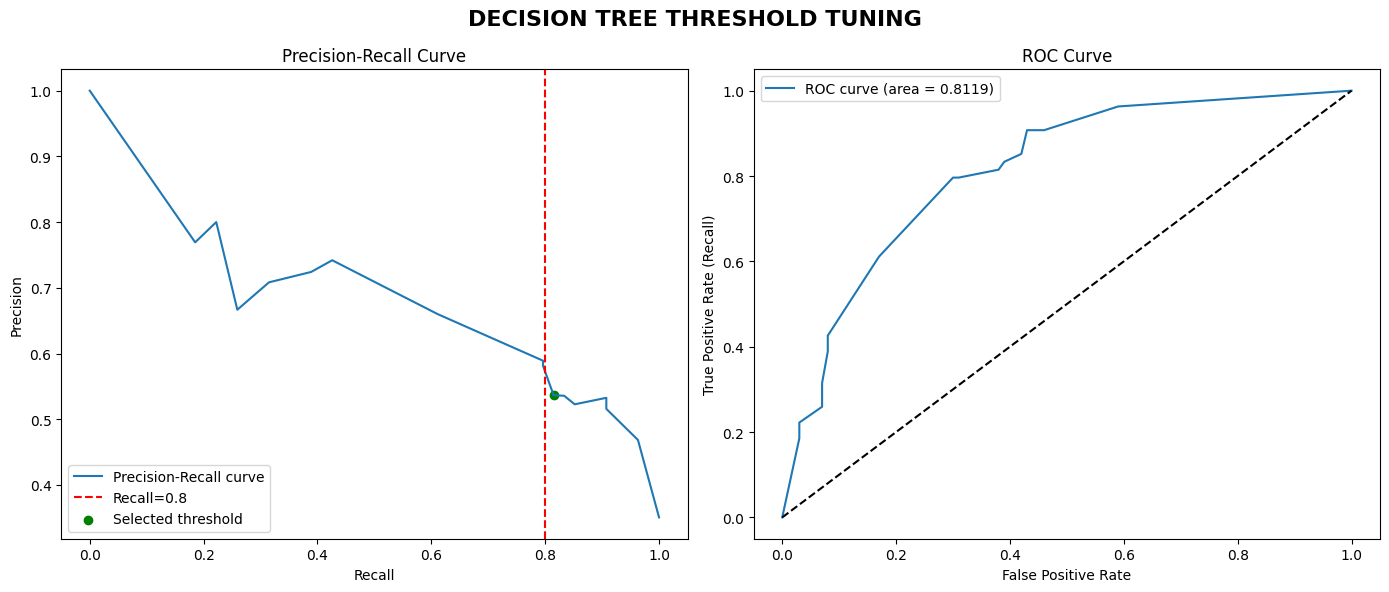

In [179]:
# Threshold tuning
model = "DECISION TREE THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_dt.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# RANDOM FOREST

In [180]:
print('='*50)
print('RANDOM FOREST')
print('='*50)


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf.fit(X_train_t,y_train)
y_pred = rf.predict(X_test_t)
y_proba = rf.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

RANDOM FOREST
ROC AUC: 0.8134
PR-AUC (AP): 0.6871
Accuracy: 0.7338
Balanced Accuracy: 0.6885
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[84 16]
 [25 29]]


In [182]:
print('='*50)
print('RANDOM FOREST HYPERPARAMETER TUNING')
print('='*50)

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

grid = GridSearchCV(
    estimator=rf,
    param_grid= params,
    scoring='average_precision',
    cv=cv,
    n_jobs= -1,
    verbose= 1,
)

grid.fit(X_train_t,y_train)
print(f"Best params: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test_t)
y_proba = best_rf.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

RANDOM FOREST HYPERPARAMETER TUNING
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}
Best CV PR-AUC: 0.7528
ROC AUC: 0.8178
PR-AUC (AP): 0.7143
Accuracy: 0.7338
Balanced Accuracy: 0.7311
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

Confusion Matrix:
 [[74 26]
 [15 39]]


RANDOM FOREST THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.432
ROC AUC: 0.8178
PR-AUC (AP): 0.7143
Accuracy: 0.7273
Balanced Accuracy: 0.7474
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       100
           1       0.58      0.81      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154

=== Confusion Matrix ===
[[68 32]
 [10 44]]
Precision at Selected Threshold: 0.5789
Recall at Selected Threshold: 0.8148


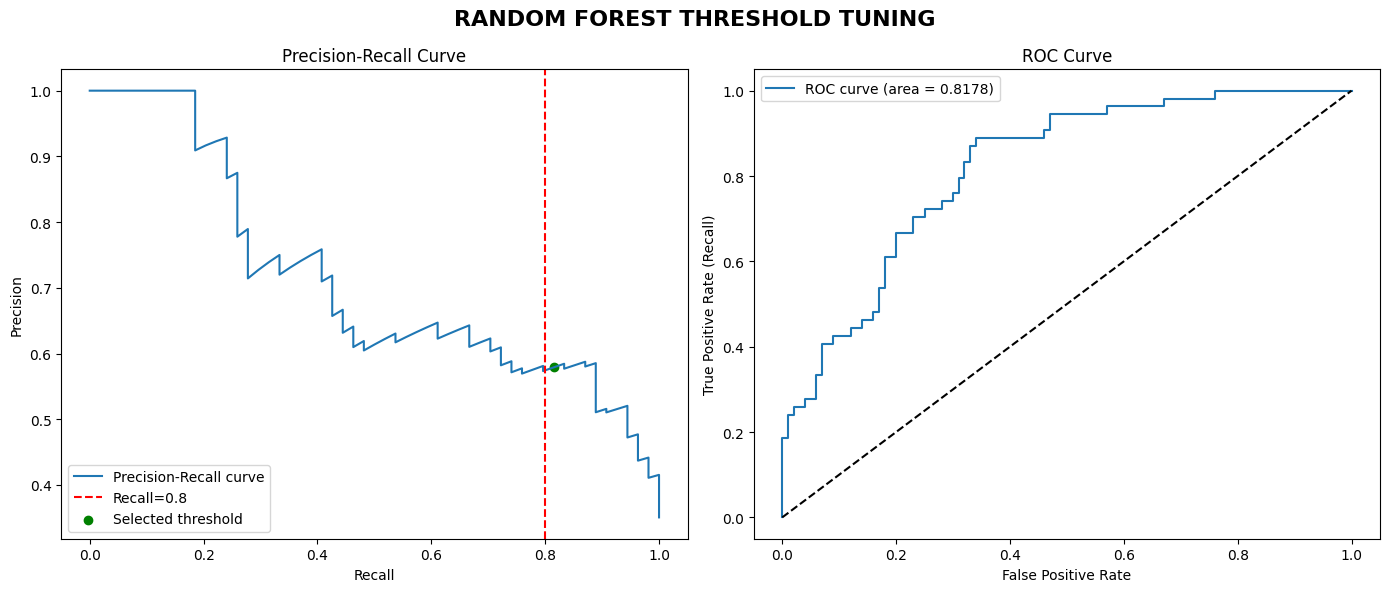

In [183]:
# Threshold tuning
model = "RANDOM FOREST THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_rf.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# ADABOOST

In [184]:
print('='*50)
print('ADABOOST')
print('='*50)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


adaboost = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(max_depth= 1,
                                      class_weight= 'balanced')
    )

params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

grid = GridSearchCV(
    estimator= adaboost,
    param_grid= params,
    cv= cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"\nBest params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_adaboost = grid.best_estimator_

y_pred = best_adaboost.predict(X_test_t)
y_proba = best_adaboost.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ADABOOST
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best params: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Best CV-PR-AUC: 0.7562

ROC AUC: 0.8036
PR-AUC: 0.6656
Accuracy: 0.7338
Balanced Accuracy: 0.7311
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

Confusion Matrix:
 [[74 26]
 [15 39]]


ADABOOST THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.446
ROC AUC: 0.8036
PR-AUC (AP): 0.6656
Accuracy: 0.7338
Balanced Accuracy: 0.7524
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       100
           1       0.59      0.81      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154

=== Confusion Matrix ===
[[69 31]
 [10 44]]
Precision at Selected Threshold: 0.5867
Recall at Selected Threshold: 0.8148


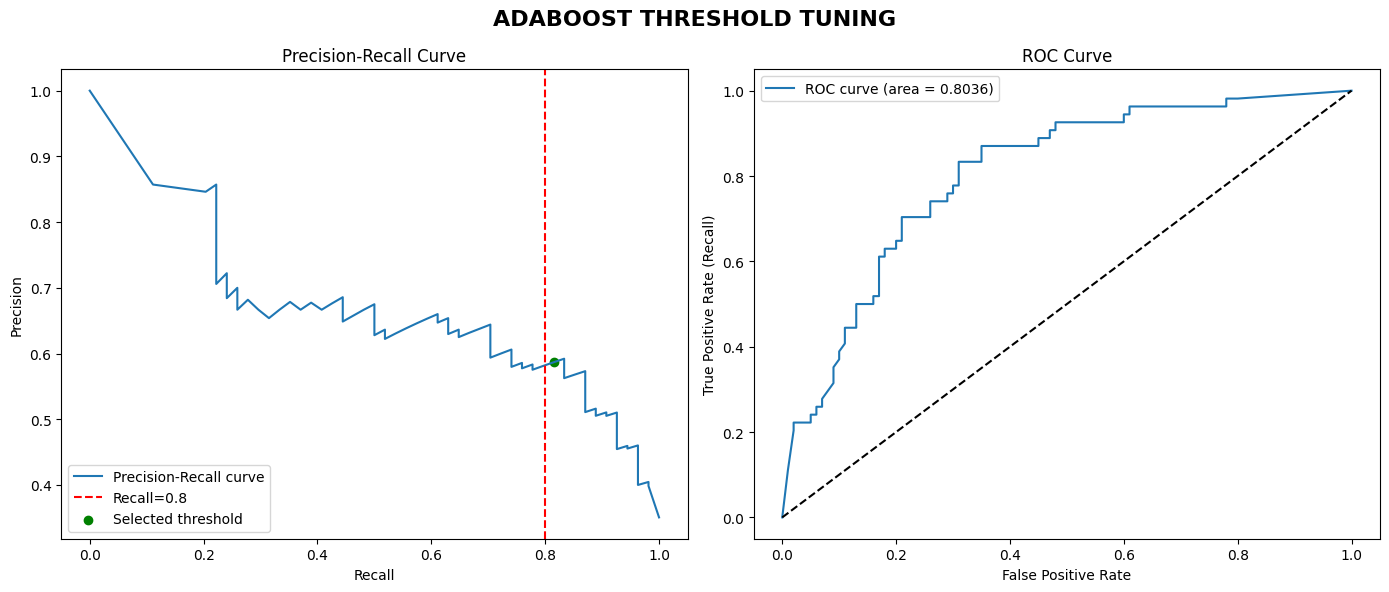

In [185]:
# Threshold tuning
model = "ADABOOST THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_adaboost.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# GRADIENT BOOST

In [186]:
print('='*50)
print("GRADIENT BOOST")
print('='*50)

from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(
    loss= 'log_loss',
    random_state= 42
)

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'subsample': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= gb,
    param_grid= params,
    scoring= 'average_precision',
    cv= cv,
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"\nBest params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_gb = grid.best_estimator_

y_pred = best_gb.predict(X_test_t)
y_proba = best_gb.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

GRADIENT BOOST
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best params: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.8}
Best CV-PR-AUC: 0.7602

ROC AUC: 0.8224
PR-AUC: 0.7145
Accuracy: 0.7597
Balanced Accuracy: 0.7170
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154

Confusion Matrix:
 [[86 14]
 [23 31]]


GRADIENT BOOST THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.246
ROC AUC: 0.8224
PR-AUC (AP): 0.7145
Accuracy: 0.7403
Balanced Accuracy: 0.7574
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       100
           1       0.59      0.81      0.69        54

    accuracy                           0.74       154
   macro avg       0.73      0.76      0.73       154
weighted avg       0.78      0.74      0.75       154

=== Confusion Matrix ===
[[70 30]
 [10 44]]
Precision at Selected Threshold: 0.5946
Recall at Selected Threshold: 0.8148


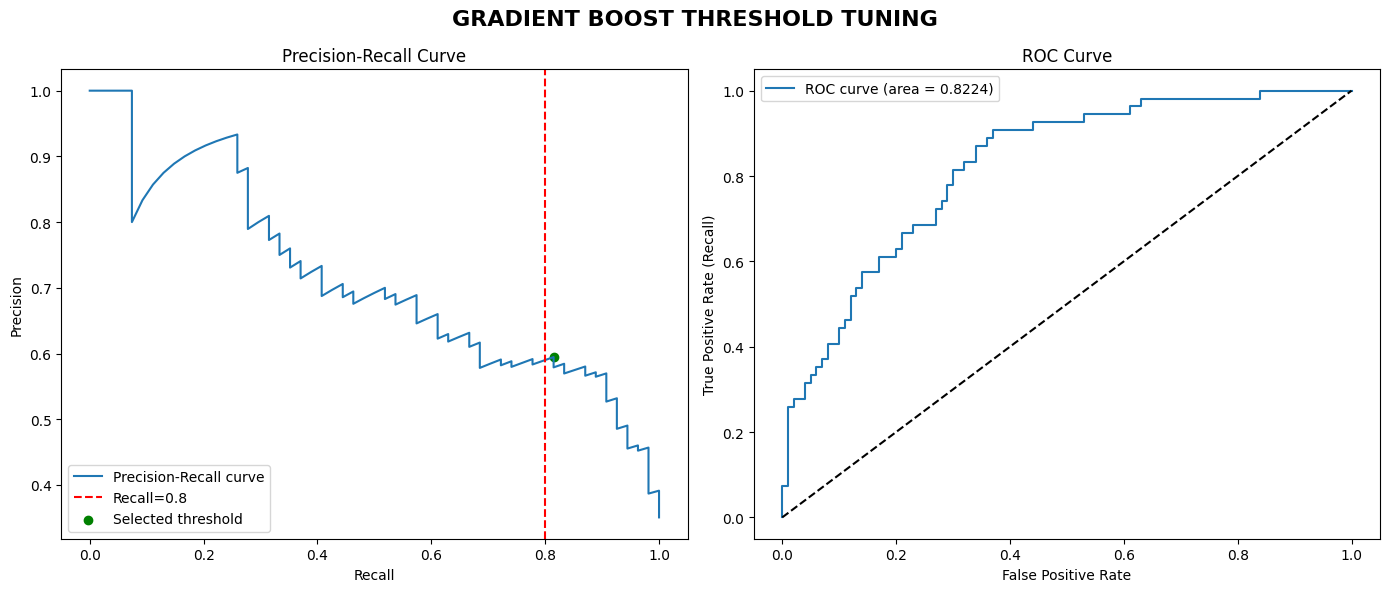

In [187]:
# Threshold tuning
model = "GRADIENT BOOST THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_gb.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# XGBOOST

In [188]:
print('='*50)
print('XGBOOST')
print('='*50)

import xgboost as xgb
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg/n_pos
print(f'scale_pos_weight = {scale_pos_weight:.2f}')

xgb_model = xgb.XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    eval_metric = 'logloss',
)

xgb_model.fit(X_train_t, y_train)

y_pred = xgb_model.predict(X_test_t)
y_proba = xgb_model.predict_proba(X_test_t)[:,1]


roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n--- XGBoost Results ---")
print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

XGBOOST
scale_pos_weight = 1.88

--- XGBoost Results ---
ROC AUC: 0.7919
PR-AUC (AP): 0.6486
Accuracy: 0.7273
Balanced Accuracy: 0.6963
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[80 20]
 [22 32]]


In [189]:
print('='*50)
print("XGBOOST HYPERPARAMETER TUNING")
print('='*50)

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_lambda': [1, 5]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

grid = GridSearchCV(
    estimator= xgb_model,
    param_grid= params,
    cv= cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test_t)
y_proba = best_xgb.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n--- Test Set Evaluation ---")
print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

XGBOOST HYPERPARAMETER TUNING
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 1.0}
Best CV-PR-AUC: 0.7619

--- Test Set Evaluation ---
ROC AUC: 0.8163
PR-AUC (AP): 0.6776
Accuracy: 0.7208
Balanced Accuracy: 0.7254
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       100
           1       0.58      0.74      0.65        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154

Confusion Matrix:
 [[71 29]
 [14 40]]


XGBOOST THRESHOLD TUNING
Selected threshold at recall >= 0.8: 0.374
ROC AUC: 0.8163
PR-AUC (AP): 0.6776
Accuracy: 0.7143
Balanced Accuracy: 0.7374
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       100
           1       0.56      0.81      0.67        54

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154

=== Confusion Matrix ===
[[66 34]
 [10 44]]
Precision at Selected Threshold: 0.5641
Recall at Selected Threshold: 0.8148


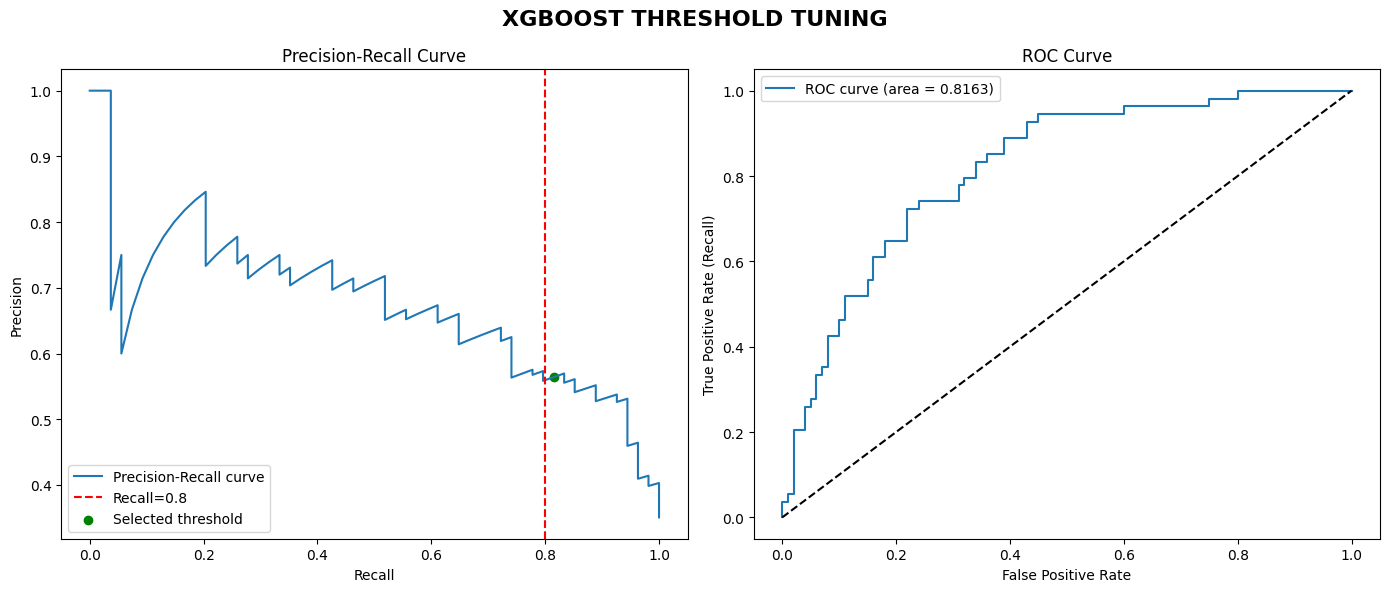

In [190]:
# Threshold tuning
model = "XGBOOST THRESHOLD TUNING"
print('='*50)
print(model)
print('='*50)

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities on test set
y_proba = best_xgb.predict_proba(X_test_t)[:, 1]

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for desired recall (e.g., > 0.8)
desired_recall = 0.8
idx_arr = np.where(recall >= desired_recall)[0]
if len(idx_arr) == 0:
    print("Desired recall not achievable, using best available threshold.")
    idx = np.argmax(recall)
else:
    idx = idx_arr[-1]
optimal_threshold = pr_thresholds[idx]
print(f"Selected threshold at recall >= {desired_recall}: {optimal_threshold:.3f}")

# Apply the chosen threshold to predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Calculate evaluation metrics
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
pr_auc = average_precision_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)

classification_rep = classification_report(y_test, y_pred_optimal)
cm = confusion_matrix(y_test, y_pred_optimal)

# Print all metrics before plots
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("=== Classification Report ===")
print(classification_rep)
print("=== Confusion Matrix ===")
print(cm)
print(f"Precision at Selected Threshold: {precision[idx]:.4f}")
print(f"Recall at Selected Threshold: {recall[idx]:.4f}")
print("="*50)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.suptitle(model, fontsize=16, fontweight='bold')


plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.axvline(x=desired_recall, color='red', linestyle='--', label=f'Recall={desired_recall}')
plt.scatter(recall[idx], precision[idx], color='green', label='Selected threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()
